In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('admission.csv')

In [3]:
df.head()

,ADMIT,GRE,GPA,RANK
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
target=df[['ADMIT']]
features= df.drop(columns='ADMIT')

In [5]:
target.head()

,ADMIT
0,0
1,1
2,1
3,1
4,0


In [6]:
features.head()

,GRE,GPA,RANK
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4


In [7]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 3)
(100, 3)
(300, 1)
(100, 1)


In [9]:
log_model= LogisticRegression()

In [10]:
log_model.fit(x_train,y_train)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [13]:
y_pred= log_model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [14]:
accuracy_score(y_test,y_pred)

0.63

In [16]:
## changing the Thershold
y_pred1= [1 if x[1]>=0.4 else 0 for x in log_model.predict_proba(x_test)]
accuracy_score(y_test,y_pred1)

0.64

In [12]:
log_model.predict_proba(x_test)

array([[0.68252193, 0.31747807],
       [0.87744779, 0.12255221],
       [0.48256058, 0.51743942],
       [0.86679746, 0.13320254],
       [0.93027558, 0.06972442],
       [0.69139854, 0.30860146],
       [0.61164889, 0.38835111],
       [0.82789895, 0.17210105],
       [0.78305594, 0.21694406],
       [0.73953192, 0.26046808],
       [0.88266987, 0.11733013],
       [0.58036674, 0.41963326],
       [0.84853288, 0.15146712],
       [0.73136097, 0.26863903],
       [0.62976917, 0.37023083],
       [0.86314428, 0.13685572],
       [0.58562528, 0.41437472],
       [0.88252094, 0.11747906],
       [0.82980417, 0.17019583],
       [0.83263704, 0.16736296],
       [0.87632849, 0.12367151],
       [0.70645687, 0.29354313],
       [0.60348332, 0.39651668],
       [0.52062454, 0.47937546],
       [0.53629978, 0.46370022],
       [0.77364866, 0.22635134],
       [0.74850836, 0.25149164],
       [0.71602515, 0.28397485],
       [0.81709857, 0.18290143],
       [0.84547159, 0.15452841],
       [0.

In [17]:
df.ADMIT.value_counts()

0    273
1    127
Name: ADMIT, dtype: int64

In [18]:
273/400

0.6825

In [19]:
127/400

0.3175

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
import seaborn as sns

In [21]:
conf= confusion_matrix(y_test,y_pred)
conf

array([[58,  6],
       [31,  5]], dtype=int64)

Text(0.5, 1.0, 'confusion_matrix')

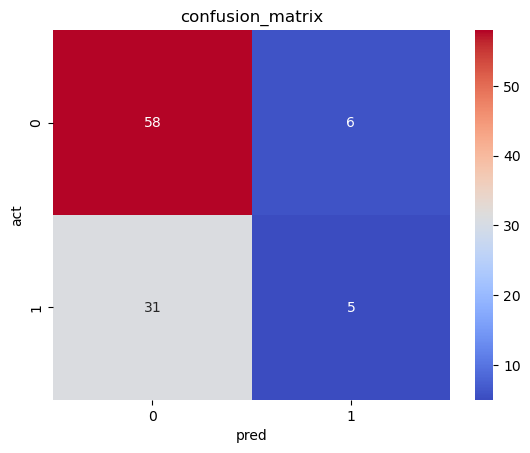

In [24]:
sns.heatmap(conf,annot=True,cmap=plt.cm.coolwarm)
plt.xlabel('pred')
plt.ylabel('act')
plt.title('confusion_matrix')

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76        64
           1       0.45      0.14      0.21        36

    accuracy                           0.63       100
   macro avg       0.55      0.52      0.49       100
weighted avg       0.58      0.63      0.56       100



## ROC Curve

In [35]:
from sklearn.metrics import roc_auc_score,roc_curve

In [36]:
prob=log_model.predict_proba(x_test)[:,1]

In [37]:
auc_score= roc_auc_score(y_test,prob)
auc_score= round(auc_score,3)
auc_score

0.614

In [39]:
fpr,tpr,thr=roc_curve(y_test,prob)

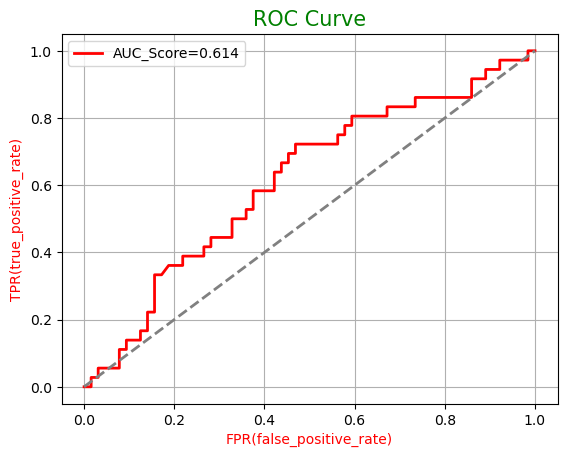

In [51]:
plt.plot(fpr,tpr,linewidth=2,color='red',label=f'AUC_Score={auc_score}')
plt.plot([0,1],linestyle='--',color='grey',linewidth=2)
plt.xlabel('FPR(false_positive_rate)',color='red',size=10)
plt.ylabel('TPR(true_positive_rate)',color='red',size=10)
plt.title('ROC Curve',color='green',size=15)
plt.grid()
plt.legend()